In [ ]:
#put together each unit to create a complete pipeline 

In [4]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\jacob/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-8 Python-3.12.3 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 28.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
#current model

In [ ]:
# Imports
import torch
from PIL import Image
import os
import tempfile
import cv2
import subprocess
import re


In [85]:
def run_alpr(image_path):
    command = [
        'alpr',
        '-c', 'us',
        '--topn', '1',
        image_path
    ]
    try:
        result = subprocess.run(command, capture_output=True, text=True, check=True)
        return result.stdout
    except subprocess.CalledProcessError as e:
        print(f"Error running alpr on {image_path}: {e}")
        return None

def process_image(image_path):
    #print(f"Processing image: {image_path}")
    alpr_output = run_alpr(image_path)
    if alpr_output:
        #print("ALPR Output:")
        return alpr_output
    else:
        print("No output from ALPR.")

In [ ]:

def Yolov5_Detection(img)

    results = model(img) #Full image
    #results.show()
    
    
    boxes = results.xyxy[0]  # Get the bounding box coordinates for the image
    for result in boxes: 
        x1, y1, x2, y2, conf, cls = result  # Bounding box coordinates, confidence, and class index
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        label = results.names[int(cls)]  # Get the class name using the class index
        confidence = conf.item() #Get confidence

        cropped_image = image.crop((x1, y1, x2, y2))
        
       # return 

        print(confidence)
        print(label)

In [54]:
def Yolov5_Detection_V2(img):

    results = model(img) #Full image

    
    x1, y1, x2, y2, conf, cls = result  # Bounding box coordinates, confidence, and class index
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    label = results.names[int(cls)]  # Get the class name using the class index
    confidence = conf.item() #Get confidence

    cropped_image = image.crop((x1, y1, x2, y2)) #get cropped image
    return  results, cropped_image, confidence, label


In [93]:


def extract_plate_info(raw_output):
    # Use regular expressions to find the license plate and confidence
    match = re.search(r'- (\w+)\t confidence: ([\d.]+)', raw_output)
    
    if match:
        plate = match.group(1)
        confidence = match.group(2)
        return [plate, confidence]
    else:
        return None

In [63]:
Yolov5_Detection_V2('C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\TEST_PHOTOS\\TEST1.jpg')

(YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 1216x2000 1 car
 Speed: 38.1ms pre-process, 7.0ms inference, 69.1ms NMS per image at shape (1, 3, 416, 640),
 <PIL.Image.Image image mode=RGB size=1375x1103>,
 0.5960860252380371,
 'car')

In [95]:
def Driver():
    feed = 'C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\TEST_PHOTOS\\TEST1.jpg'
    yolo_det = Yolov5_Detection_V2(feed) #Takes a frame from feed

    with tempfile.TemporaryDirectory() as temp_dir:

        cropped_image = yolo_det[1] #Only grab the inner bounding box

        # Save the cropped image to a temporary file
        cropped_image_path = os.path.join(temp_dir, f'cropped_image_{i}.jpg')
        cropped_image.save(cropped_image_path)
    
        #OpenALPR to read license plate
        OpenALPR = process_image(cropped_image_path)
        OpenALPR = extract_plate_info(OpenALPR)

    return yolo_det, OpenALPR
     

In [96]:
yolo, alpr = Driver()

In [97]:
alpr

['HC088A', '92.6548']

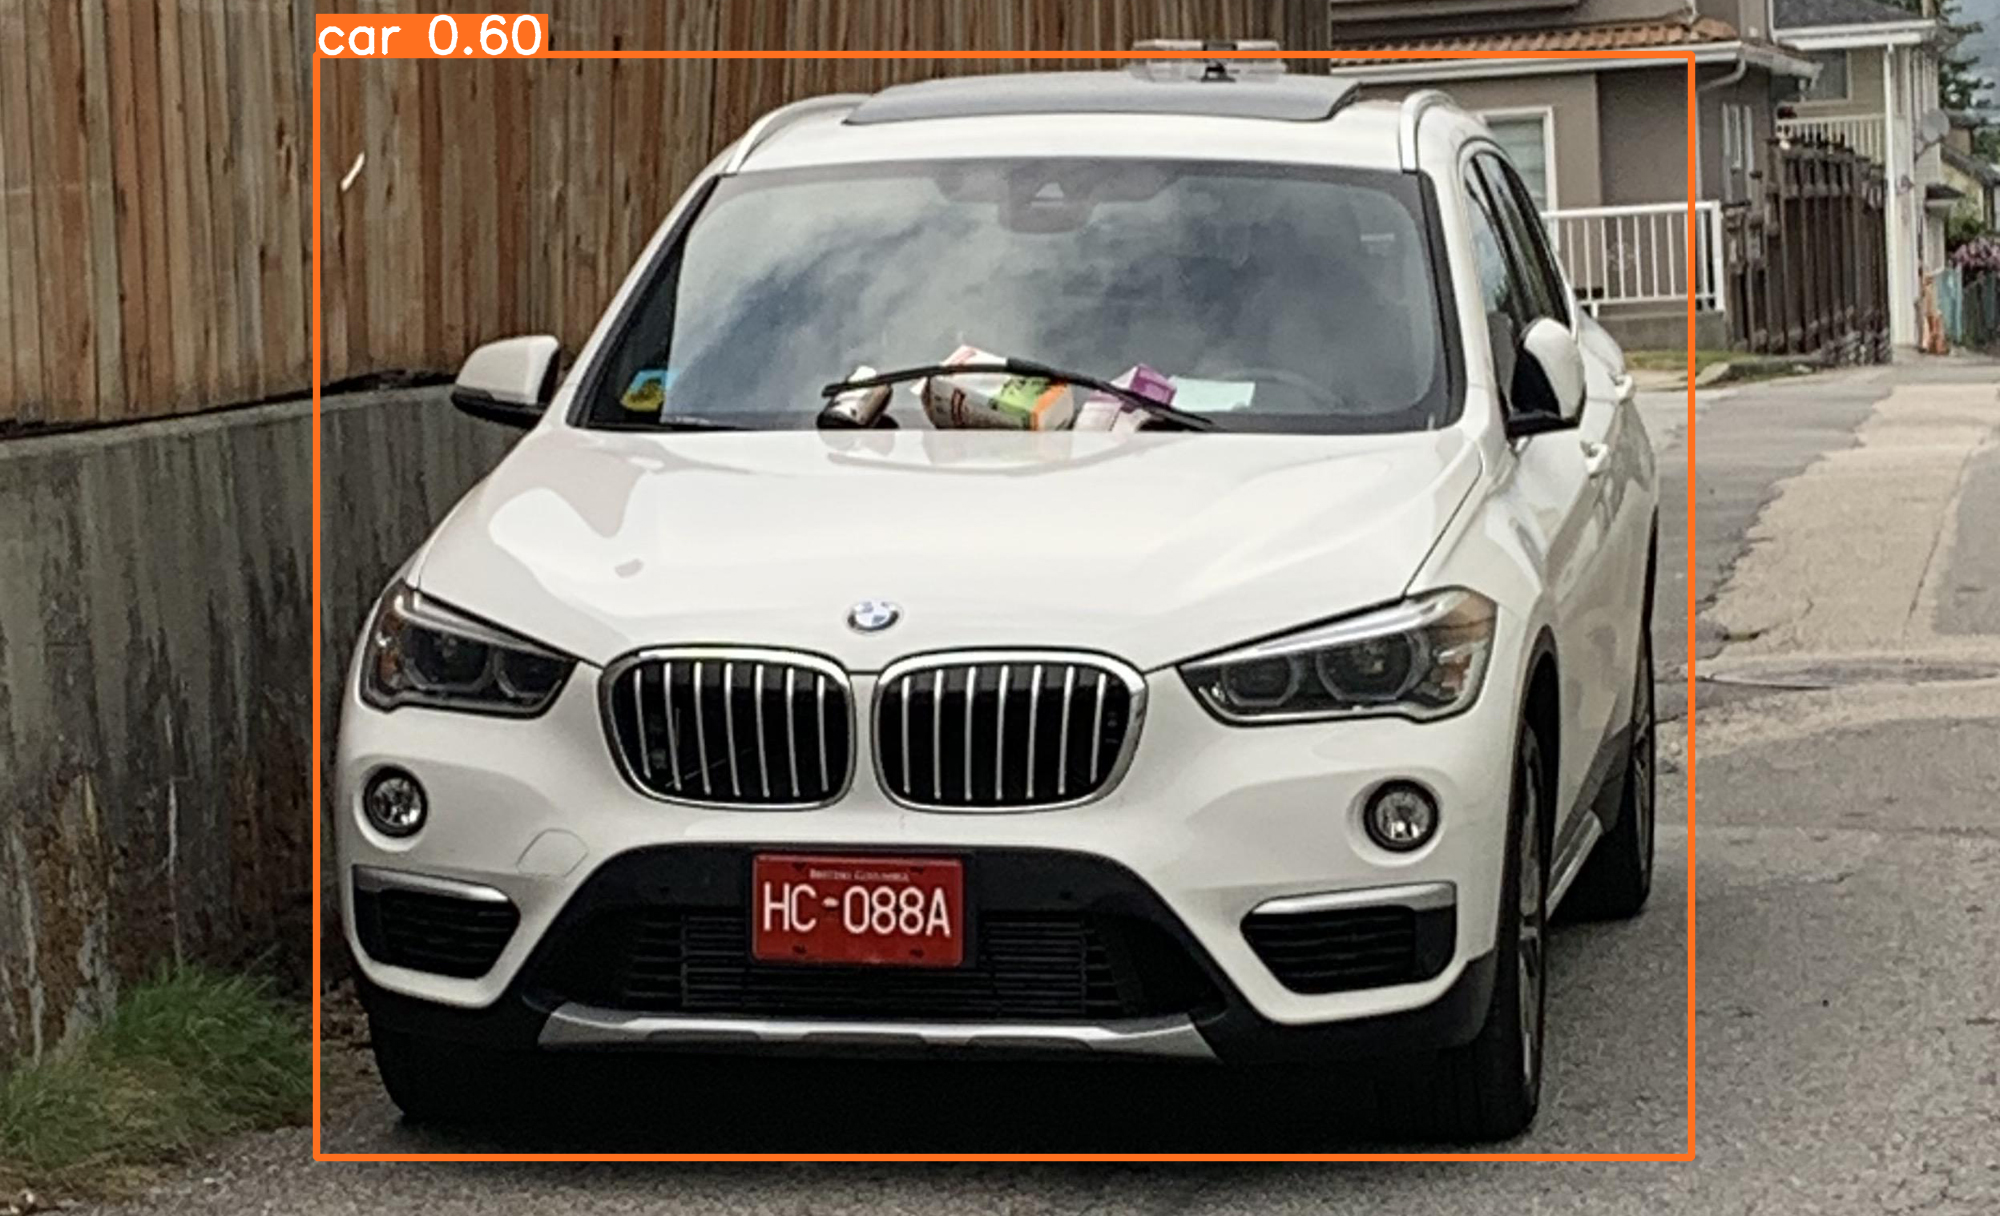

['HC088A', '92.6548']


In [98]:
yolo[0].show()
print(alpr)